In [ ]:
# Positive Reviews
import os;
with open("./tr_polarity.pos", 'rb') as f:
     # reviews_pos = f.read().decode('iso-8859-9').replace('\r', '');
     reviews_pos = f.read().decode('cp1254').replace('\r', '').splitlines();

reviews_pos

In [ ]:
# Negative Reviews
with open("./tr_polarity.neg", 'rb') as f:
     reviews_neg = f.read().decode('cp1254').replace('\r', '').splitlines();

reviews_neg

In [157]:
# Check Dataset Size Equality
assert(len(reviews_pos) == len(reviews_neg))

In [ ]:
# Slice the dataset for testing, cross valitation and training
# 10% for testing
# 90% for training

data_size = len(reviews_pos)
test_size = int(data_size * 0.1)
print("Data size = %d, Test Size = %d, Last Index = %d" % (data_size, test_size, test_size * 10));
test_index = [(x * test_size, x * test_size + test_size) for x in range(10)];
print("Dataset slices for testing: %s" % test_index)

In [159]:
# Correction: include remaining reviews, if any, to the last index pair
test_index[9] = (test_index[9][0], data_size);
print(test_index[9][0])

In [160]:
# Utility function for dataset splitting
def split_dataset(data, split_indexes):
  data_test  = data[split_indexes[0]:split_indexes[1]];
  data_training = data[0:split_indexes[0]] + data[split_indexes[1]:len(data)];
  return { "test": data_test, "train": data_training};

In [161]:
# Cross validation
'''
for i in range(10):
    splits = split_dataset(reviews_pos, test_index[i])
    pos_test = splits['test']
    pos_train = splits['train']
    print("Pos test size: %d, \n Last item : %s" % (len(pos_test), pos_test[-1]) )
    print("Pos train size: %d, \n Last item : %s" % (len(pos_train), pos_train[0]) )

    splits = split_dataset(reviews_neg, test_index[i])
    neg_test = splits['test']
    neg_train = splits['train']
    print("Neg test size: %d, \n Last item : %s" % (len(neg_test), neg_test[-1]) )
    print("Neg train size: %d, \n Last item : %s" % (len(neg_train), neg_train[0]) )
'''


Pos test size: 534, 
 Last item : flim araba takip sahnesiyle baslior daha sinemada yerlesmeye calisirken bir anda koltuga kilitleniorsunuz. aksiyonu yuksek bir flim olmus gercekten bazi yerlerin hakkini vermek gerekior. .5. 
Pos train size: 4797, 
 Last item : gerçekten harika bir yapim birçok kez izledim gene izlerim özgürlük askini ve ingilizlerin ne kadar vahset olduklarini gözler önüne seren bir film ve tabi ki ask.... 
Neg test size: 534, 
 Last item : agda sahnesini iyi pazarlayan , oyunculuk denen olayin bulunmadigi rezalet bir film... 
Neg train size: 4797, 
 Last item : giseye oynayan bir film.mel gibson'in oyunculugu yine çok kötü.film bastan sona duygu sömürüsü ama anlayan nerde!. 


In [162]:
import nltk;
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enest\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [163]:
# Tokenize
reviews_pos_tokens = [nltk.word_tokenize(doc) for doc in reviews_pos];
reviews_neg_tokens = [nltk.word_tokenize(doc) for doc in reviews_neg];

In [164]:
# Validate test split construction
splits = split_dataset(reviews_pos_tokens, test_index[0]);
pos_test = splits['test'];
pos_train = splits['train'];
print("Pos test size: %d, \n Last item : %s" % (len(pos_test), pos_test[-1]) )
print("Pos train size: %d, \n Last item : %s" % (len(pos_train), pos_train[0]) )

splits = split_dataset(reviews_neg_tokens, test_index[0]);
neg_test = splits['test'];
neg_train = splits['train'];
print("Neg test size: %d, \n Last item : %s" % (len(neg_test), neg_test[-1]) )
print("Neg train size: %d, \n Last item : %s" % (len(neg_train), neg_train[0]) )

Pos test size: 533, 
 Last item : ['romantik-komedi', 'severler', 'icin', 'cok', 'iyi', 'bi', 'secim', 'olur', 'cok', 'sicak', 'eglenceli', 'komik', 've', 'iyi', 'oyunculukla', 'birlesince', 'guzel', 'bi', 'film', 'cikmis', 'julia', 'roberts', 'yine', 'oyunculuk', 'dersi', 'vermis', 'tavsiye', 'ederim', '.']
Pos train size: 4798, 
 Last item : ['çok', 'fazla', 'eglenceli', 'bir', 'romantik-komedi', 'idi', '.', 'en', 'fazla', 'gösterimde', 'kalan', ',', 'filmlerden', 'birisi', 'ayrica', '....']
Neg test size: 533, 
 Last item : ['kesinlikle', 'iyi', 'bir', 'psikoloji', 'gerilim', 'bekleyenlerin', 'gerilimlerini', 'karsilamayan', 'bol', 'kliseli', 'vasatin', 'bile', 'altinda', 'bir', 'film', 'filmin', 'tek', 'bir', 'artisi', 'var', 'oda', 'john', 'cusack', 'in', 'müthis', 'oyunculugu', 'bundan', 'öte', '1408', 'de', 'hiç', 'bir', 'sey', 'yok', '.', '.']
Neg train size: 4798, 
 Last item : ['bu', 'filmin', 'neresini', 'begendiniz', 'anlamadim', 'saçma', 'sapan', 'bi', 'gerilim', 'filmi', 

In [165]:

#! Bi üsttekinin aynısı?
splits = split_dataset(reviews_pos_tokens, test_index[0]);
pos_test = splits['test'];
pos_train = splits['train'];
print("Pos test size: %d, \n Last item : %s" % (len(pos_test), pos_test[-1]) )
print("Pos train size: %d, \n Last item : %s" % (len(pos_train), pos_train[0]) )

splits = split_dataset(reviews_neg_tokens, test_index[0]);
neg_test = splits['test'];
neg_train = splits['train'];
print("Neg test size: %d, \n Last item : %s" % (len(neg_test), neg_test[-1]) )
print("Neg train size: %d, \n Last item : %s" % (len(neg_train), neg_train[0]) )

Pos test size: 533, 
 Last item : ['romantik-komedi', 'severler', 'icin', 'cok', 'iyi', 'bi', 'secim', 'olur', 'cok', 'sicak', 'eglenceli', 'komik', 've', 'iyi', 'oyunculukla', 'birlesince', 'guzel', 'bi', 'film', 'cikmis', 'julia', 'roberts', 'yine', 'oyunculuk', 'dersi', 'vermis', 'tavsiye', 'ederim', '.']
Pos train size: 4798, 
 Last item : ['çok', 'fazla', 'eglenceli', 'bir', 'romantik-komedi', 'idi', '.', 'en', 'fazla', 'gösterimde', 'kalan', ',', 'filmlerden', 'birisi', 'ayrica', '....']
Neg test size: 533, 
 Last item : ['kesinlikle', 'iyi', 'bir', 'psikoloji', 'gerilim', 'bekleyenlerin', 'gerilimlerini', 'karsilamayan', 'bol', 'kliseli', 'vasatin', 'bile', 'altinda', 'bir', 'film', 'filmin', 'tek', 'bir', 'artisi', 'var', 'oda', 'john', 'cusack', 'in', 'müthis', 'oyunculugu', 'bundan', 'öte', '1408', 'de', 'hiç', 'bir', 'sey', 'yok', '.', '.']
Neg train size: 4798, 
 Last item : ['bu', 'filmin', 'neresini', 'begendiniz', 'anlamadim', 'saçma', 'sapan', 'bi', 'gerilim', 'filmi', 

In [166]:
print(pos_train[:3])

[['çok', 'fazla', 'eglenceli', 'bir', 'romantik-komedi', 'idi', '.', 'en', 'fazla', 'gösterimde', 'kalan', ',', 'filmlerden', 'birisi', 'ayrica', '....'], ['filmi', 'ilk', 'çiktigi', 'zaman', 'izlemistim', ',', 'çok', 'begenip', '2', 'kere', 'gitmistim', 'sinemaya', '.', 'üzerinden', 'o', 'kadar', 'zaman', 'geçmesine', 'ragmen', 'hala', 'her', 'sahnesi', 'aklimda', '!', '.'], ['böyle', 'güzel', 'bir', 'filmi', 'daha', 'yeni', 'izledigim', 'için', 'kendime', 'çok', 'kiziyorum', 'müthismis', 'çok', 'begendim', '...']]


In [ ]:
# Vocabulary
pos_train_flat = [X for x in pos_train for X in x];
V_pos = { x for x in pos_train_flat }; 
print("|V_pos| = %d, \n elements: %s" % (len(V_pos), V_pos))

In [168]:
# 1-gram statistics, i.e. 1-gram LM for POS
N = len(V_pos);
LM_pos = {x:0 for x in V_pos};
for token in pos_train_flat:
  LM_pos[token] += 1;

# Most frequent tokens
mfreq_pos = [(x,LM_pos[x]) for x in LM_pos];
mfreq_pos.sort(key=lambda t: t[1], reverse=1);

print("Most frequent 10 tokens: %s" % (mfreq_pos[:20]))

Most frequent 10 tokens: [('.', 4457), ('bir', 4103), ('film', 3209), ('..', 2350), ('çok', 2011), (',', 1880), ('ve', 1575), ('bu', 1500), ('...', 1188), ('güzel', 1150), ('iyi', 1086), ('filmi', 979), ('en', 935), ('bi', 916), ('ama', 889), ('....', 882), ('!', 693), ('kadar', 635), ('bence', 628), ('daha', 558)]


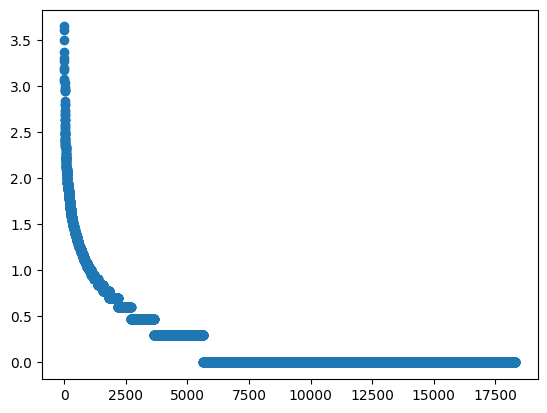

In [169]:
import matplotlib.pyplot as plt
import math as math

y = [math.log10(t[1]) for t in mfreq_pos];
x = range(1,len(y)+1)

plt.scatter(x, y)
plt.show();

In [170]:
# hapax-legomenon: A word that occurs only once in a given corpus.
print("hapax-legomenon: %d" % len([x for x in LM_pos if LM_pos[x]==1]))

hapax-legomenon: 12663


In [171]:
# Ratio of hapax tokens
print("Ratio of hapax tokens: %.2f" % (len([x for x in LM_pos if LM_pos[x]==1])/N))

Ratio of hapax tokens: 0.69


In [172]:
# dis-legomenon: A word that occurs only twice in a given corpus.
print("dis-legomenon: %d" % len([x for x in LM_pos if LM_pos[x]==2]))

dis-legomenon: 2009


In [130]:
# tris-legomenon: A word that occurs only three times in a given corpus.
print("tris-legomenon: %d" % len([x for x in LM_pos if LM_pos[x]==3]))

tris-legomenon: 941


In [131]:
# tetrakis legomenon: A word that occurs only four times in a given corpus.
print("tetrakis-legomenon: %d" % len([x for x in LM_pos if LM_pos[x]==4]))

tetrakis-legomenon: 519


Language Model of the Negative Reviews

In [ ]:
# Vocabulary
neg_train_flat = [X for x in neg_train for X in x];
V_neg = { x for x in neg_train_flat }; 
print("|V| = %d, \n elements: %s" % (len(V_neg), V_neg))

In [174]:
# 1-gram statistics, i.e. 1-gram LM for Neg
N = len(V_neg);
LM_neg = {x:0 for x in V_neg};
for token in neg_train_flat:
  LM_neg[token] += 1;

# Most frequent tokens
mfreq_neg = [(x,LM_neg[x]) for x in LM_neg];
mfreq_neg.sort(key=lambda t: t[1], reverse=1);

print("Most frequent 10 tokens: %s" % (mfreq_neg[:20]))

Most frequent 10 tokens: [('.', 4860), ('bir', 3533), ('film', 2715), ('..', 2340), (',', 2028), ('bu', 1884), ('çok', 1542), ('ve', 1268), ('ama', 1116), ('filmi', 1095), ('...', 988), ('kötü', 931), ('kadar', 819), ('....', 788), ('bi', 766), ('!', 724), ('daha', 631), ('ne', 595), ('en', 590), ('hiç', 558)]


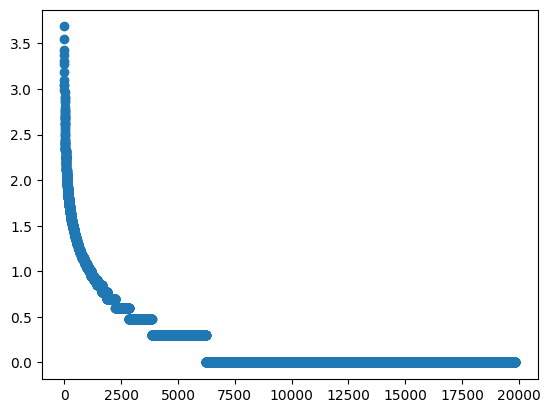

In [175]:
import matplotlib.pyplot as plt
import math as math

y = [math.log10(t[1]) for t in mfreq_neg];
x = range(1,len(y)+1)

plt.scatter(x, y)
plt.show();

In [176]:
# hapax-legomenon: A word that occurs only once in a given corpus.
print("hapax-legomenon: %d" % len([x for x in LM_neg if LM_neg[x]==1]))

hapax-legomenon: 13612


In [177]:
# Ratio of hapax tokens
print("Ratio of hapax tokens: %.2f" % (len([x for x in LM_neg if LM_neg[x]==1])/N))

Ratio of hapax tokens: 0.69


In [148]:
# dis-legomenon: A word that occurs only twice in a given corpus.
print("dis-legomenon: %d" % len([x for x in LM_neg if LM_neg[x]==2]))

dis-legomenon: 2379


In [149]:
# tris-legomenon: A word that occurs only three times in a given corpus.
print("tris-legomenon: %d" % len([x for x in LM_neg if LM_neg[x]==3]))

tris-legomenon: 1000


In [150]:
# tetrakis legomenon: A word that occurs only four times in a given corpus.
print("tetrakis-legomenon: %d" % len([x for x in LM_neg if LM_neg[x]==4]))

tetrakis-legomenon: 588


Language model of the positive reviews.

In [178]:
#first 10 elements
print('Vocabulary: ', list(V_pos)[:10])

Vocabulary:  ['asiyor', '10000000000000', 'ma', 'verir', 'koparsiniz', 'gördügünüzde', 'hector', 'yanlisi', 'biri.gerçekten', 'harikaydi.duragan']


In [179]:
vocab = V_pos

In [180]:
for idx, token in enumerate(vocab):
  print('index = %d \t vocabulary term: %s' % (idx, token))

index = 0 	 vocabulary term: asiyor
index = 1 	 vocabulary term: 10000000000000
index = 2 	 vocabulary term: ma
index = 3 	 vocabulary term: verir
index = 4 	 vocabulary term: koparsiniz
index = 5 	 vocabulary term: gördügünüzde
index = 6 	 vocabulary term: hector
index = 7 	 vocabulary term: yanlisi
index = 8 	 vocabulary term: biri.gerçekten
index = 9 	 vocabulary term: harikaydi.duragan
index = 10 	 vocabulary term: dagilmadan
index = 11 	 vocabulary term: ait
index = 12 	 vocabulary term: edeceginiz
index = 13 	 vocabulary term: çooook
index = 14 	 vocabulary term: mukemmelde
index = 15 	 vocabulary term: kurallara
index = 16 	 vocabulary term: beklenirse
index = 17 	 vocabulary term: sasiriyorum
index = 18 	 vocabulary term: düz
index = 19 	 vocabulary term: yasamasini
index = 20 	 vocabulary term: will
index = 21 	 vocabulary term: baslangicindaki
index = 22 	 vocabulary term: dalda
index = 23 	 vocabulary term: isteyeceginiz
index = 24 	 vocabulary term: be
index = 25 	 vocabula

In [ ]:
term2idx = {}
for idx, token in enumerate(vocab):
    term2idx.update({token: idx})

print(term2idx)

In [182]:
pos_test[:1]

[['gerçekten',
  'harika',
  'bir',
  'yapim',
  'birçok',
  'kez',
  'izledim',
  'gene',
  'izlerim',
  'özgürlük',
  'askini',
  've',
  'ingilizlerin',
  'ne',
  'kadar',
  'vahset',
  'olduklarini',
  'gözler',
  'önüne',
  'seren',
  'bir',
  'film',
  've',
  'tabi',
  'ki',
  'ask',
  '....']]

In [183]:
#Indexes for the terms of individual documents. Documents are the test reviews.

print('Term indexes for Review 1: %s' % [term2idx.get(token) for token in pos_test[0]])


Term indexes for Review 1: [15390, 14228, 554, 17800, 767, 17334, 5969, 14974, 6278, 15595, 4227, 13959, None, 11897, 5931, 10299, None, 2361, 15904, 4953, 554, 6018, 13959, 8328, 7107, 7453, 15118]


In [ ]:
# To access terms via index, create a new dictionary from index to terms
idx2term = {}
for term in term2idx:
    idx = term2idx.get(term)
    idx2term.update({idx: term})
print(idx2term)

In [ ]:
pos_train

In [ ]:
# list of document vectors which is includes 0 or 1 for the train positive reviews.
# 1 means the term is in the document, 0 means the term is not in the document.
pos_train_vectors = []
for doc in pos_train:
    doc_vector = [0] * len(vocab)
    for token in doc:
        idx = term2idx.get(token)
        doc_vector[idx] = 1
    pos_train_vectors.append(doc_vector)
print('Number of documents in the training set: %d' % len(pos_train_vectors))
print('Number of terms in the vocabulary: %d' % len(vocab)) 
print(len(pos_train_vectors))
print(pos_train_vectors[0])



In [245]:
print(pos_train_vectors[5][228], pos_train_vectors[3][227], pos_train_vectors[1][227])

0 0 0


In [246]:
# create a new vector by averaging all vectors in the pos_train_vectors
pos_train_vector_avg = [0] * len(vocab)
for doc_vector in pos_train_vectors:
    for idx, val in enumerate(doc_vector):
        pos_train_vector_avg[idx] += val
for idx, val in enumerate(pos_train_vector_avg):
    pos_train_vector_avg[idx] = val / len(pos_train_vectors)


In [247]:
print(pos_train_vector_avg[227], pos_train_vector_avg[228])
print(type(pos_train_vector_avg))
print(type(pos_train_vectors))

0.00020842017507294707 0.0020842017507294707
<class 'list'>
<class 'list'>


In [248]:
pos_train_vector_avg[:5]

[0.00020842017507294707,
 0.00020842017507294707,
 0.00020842017507294707,
 0.0006252605252188412,
 0.00020842017507294707]

In [ ]:
#term by document matrix from list of document vectors
matrix = [[doc_vec[j] for doc_vec in pos_train_vectors] for j in range(len(vocab))]

print('\t d1 \t d2 \t d3 \t d4 \t d5')
print(type(matrix))






In [238]:
print('\t \t d1 \t d2 \t d3 \t d4 \t d5')
for idx, row in enumerate(matrix):
    print("{}\t  {}\t  {}\t {}\t  {}\t  {}\t  {}".format(idx2term[idx], row[0], row[1], row[2], row[3], row[4], row[5]))

	 	 d1 	 d2 	 d3 	 d4 	 d5
asiyor	  0	  0	 0	  0	  0	  0
10000000000000	  0	  0	 0	  0	  0	  0
ma	  0	  0	 0	  0	  0	  0
verir	  0	  0	 0	  0	  0	  0
koparsiniz	  0	  0	 0	  0	  0	  0
gördügünüzde	  0	  0	 0	  0	  0	  0
hector	  0	  0	 0	  0	  0	  0
yanlisi	  0	  0	 0	  0	  0	  0
biri.gerçekten	  0	  0	 0	  0	  0	  0
harikaydi.duragan	  0	  0	 0	  0	  0	  0
dagilmadan	  0	  0	 0	  0	  0	  0
ait	  0	  0	 0	  0	  0	  0
edeceginiz	  0	  0	 0	  0	  0	  0
çooook	  0	  0	 0	  0	  0	  0
mukemmelde	  0	  0	 0	  0	  0	  0
kurallara	  0	  0	 0	  0	  0	  0
beklenirse	  0	  0	 0	  0	  0	  0
sasiriyorum	  0	  0	 0	  0	  0	  0
düz	  0	  0	 0	  0	  0	  0
yasamasini	  0	  0	 0	  0	  0	  0
will	  0	  0	 0	  0	  0	  0
baslangicindaki	  0	  0	 0	  0	  0	  0
dalda	  0	  0	 0	  0	  0	  0
isteyeceginiz	  0	  0	 0	  0	  0	  0
be	  0	  0	 0	  0	  0	  0
deger	  0	  0	 0	  0	  0	  0
gelecek	  0	  0	 0	  0	  0	  0
düsmeyen	  0	  0	 0	  0	  0	  0
girliklerinde	  0	  0	 0	  0	  0	  0
bilsinler	  0	  0	 0	  0	  0	 

In [68]:
doc1_vec = pos_train_vectors[0]
doc2_vec = pos_train_vectors[1]

In [69]:
#Scalar product of all document vectors. We will find one vector which is the most similar to all other vectors. It is the mean vector.

scalar_products = 0
for i, j in zip(doc1_vec, doc2_vec):
    scalar_products += i * j
print('Scalar product of doc1 and doc2: %d' % scalar_products)


Scalar product of doc1 and doc2: 3


In [102]:
#intersection / union just for 6 documents

#! SET BASED SIMILARITY
#! Does not work
sims = [[sum({i and j for i, j in zip(doc1_vec, doc2_vec)}) / sum({i or j for i, j in zip(doc1_vec, doc2_vec)}) for doc1_vec in pos_train_vectors[:6]] for doc2_vec in pos_train_vectors[:6]]

print("Set-Based Similarities")
print('\t \t d1 \t d2 \t d3 \t d4 \t d5')
for idx, row in enumerate(sims):
    print("{}\t  {}\t  {}\t {}\t  {}\t  {}\t  {}".format(idx2term[idx], row[0], row[1], row[2], row[3], row[4], row[5]))


Set-Based Similarities
	 	 d1 	 d2 	 d3 	 d4 	 d5
asiyor	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0
10000000000000	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0
ma	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0
verir	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0
koparsiniz	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0
gördügünüzde	  1.0	  1.0	 1.0	  1.0	  1.0	  1.0


In [101]:

#! Cosine Similarity
from math import sqrt

sims = [[sum(i * j for i, j in zip(doc1_vec, doc2_vec)) / (sqrt(sum(i ** 2 for i in doc1_vec)) * sqrt(sum(j ** 2 for j in doc2_vec))) for doc1_vec in pos_train_vectors[:6]] for doc2_vec in pos_train_vectors[:6]]

print('Cosine similarities')
print('------------------------------------\n')
print(' \t d1 \t d2 \t d3 \t d4\t d5\t d6')
print(f'd1\t{sims[0][0]:3.2f}\t{sims[0][1]:3.2f}\t{sims[0][2]:3.2f}\t{sims[0][3]:3.2f}\t{sims[0][4]:3.2f}\t{sims[0][5]:3.2f}')
print(f'd2\t{sims[1][0]:3.2f}\t{sims[1][1]:3.2f}\t{sims[1][2]:3.2f}\t{sims[1][3]:3.2f}\t{sims[1][4]:3.2f}\t{sims[1][5]:3.2f}')
print(f'd3\t{sims[2][0]:3.2f}\t{sims[2][1]:3.2f}\t{sims[2][2]:3.2f}\t{sims[2][3]:3.2f}\t{sims[2][4]:3.2f}\t{sims[2][5]:3.2f}')
print(f'd4\t{sims[3][0]:3.2f}\t{sims[3][1]:3.2f}\t{sims[3][2]:3.2f}\t{sims[3][3]:3.2f}\t{sims[3][4]:3.2f}\t{sims[3][5]:3.2f}')
print(f'd5\t{sims[4][0]:3.2f}\t{sims[4][1]:3.2f}\t{sims[4][2]:3.2f}\t{sims[4][3]:3.2f}\t{sims[4][4]:3.2f}\t{sims[4][5]:3.2f}')
print(f'd6\t{sims[5][0]:3.2f}\t{sims[5][1]:3.2f}\t{sims[5][2]:3.2f}\t{sims[5][3]:3.2f}\t{sims[5][4]:3.2f}\t{sims[5][5]:3.2f}')



Cosine similarities
------------------------------------

 	 d1 	 d2 	 d3 	 d4	 d5	 d6
d1	1.00	0.16	0.14	0.10	0.15	0.06
d2	0.16	1.00	0.11	0.08	0.06	0.05
d3	0.14	0.11	1.00	0.11	0.08	0.18
d4	0.10	0.08	0.11	1.00	0.06	0.09
d5	0.15	0.06	0.08	0.06	1.00	0.07
d6	0.06	0.05	0.18	0.09	0.07	1.00


In [104]:
#Word cloud analysis
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [118]:
pos_train[227]

['aldigi',
 'puandan',
 'biraz',
 'daha',
 'azini',
 'hak',
 'etse',
 'de',
 'film',
 'gayet',
 'kaliteli.will',
 'smith',
 'gerçekten',
 'asmis',
 ',',
 'zaten',
 'eger',
 'çok',
 'iyi',
 'bir',
 'oyuncu',
 'olmasaydi',
 'basrolde',
 'film',
 'batardi',
 'ama',
 'will',
 'smith',
 ',',
 'tek',
 'basina',
 'kalan',
 'adam',
 'duygusunu',
 'harika',
 'yansitmis',
 '..']

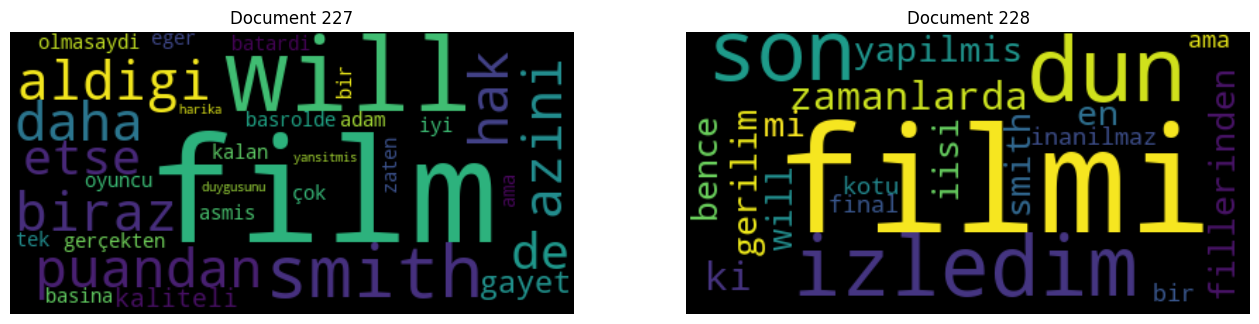

In [125]:
# Word cloud for document 227 and 228
plt.figure(figsize=(16, 16))

doc = ' '.join([w for w in pos_train[227]])
wordcloud = WordCloud().generate(doc)
plt.subplot(1, 2, 1).set_title('Document 227')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

doc2 = ' '.join([w for w in pos_train[228]])
wordcloud2 = WordCloud().generate(doc2)
plt.subplot(1, 2, 2).set_title('Document 228')
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")



plt.show()


Review analysis

In [ ]:
#Check wherher the test reviews contain anu unknown words!!!

pos_test_flat = [w for doc in pos_test for w in doc]
V_pos_test = set(pos_test_flat)
print('Number of unique words in test set: %d' % len(V_pos_test))
print(f'# of Unknow tokens = {len(V_pos_test.difference(V_pos))}, \n {V_pos_test.difference(V_pos)} ')

In [139]:
test_review = pos_test[1]
print('Test review: %s' % test_review)

V_test_review = set(test_review)
print('Unknown tokens: %s' % V_test_review.difference(V_pos))

Test review: ['her', 'izledigimde', 'hayranlik', 'duydugum', 'gerçek', 'klasik', 'diyebilecegimiz', 'filmlerden', '.', 'içinde', 'teknik', 'hatalar', 'barindirsa', 'bile', 'sinema', 'olgusunun', 'en', 'üst', 'noktalarindan', '..']
Unknown tokens: {'barindirsa', 'noktalarindan', 'olgusunun'}


In [142]:
# Calculate P(r|LM_pos)
# Take p(w_i)|LM) as 1/n as a trivial approach to 'smoothing'
score_pos = 0
for token in test_review:
    score_pos += math.log10(LM_pos.get(token,1)/N)

print('Score for positive review: %f' % score_pos)

Score for positive review: -56.309348


NEGATİF

In [151]:
score_neg = 0
for token in test_review:
    score_neg += math.log10(LM_neg.get(token,1)/N)
print('Score for negative review: %f' % score_neg)

Score for negative review: -58.697775


In [152]:
print (score_pos > score_neg)

True


In [153]:
def lm_scores(test_review):
  score_pos = 0;
  score_neg = 0;
  for token in test_review:
    score_pos += math.log10(LM_pos.get(token,1)/N);
    score_neg += math.log10(LM_neg.get(token,1)/N);
  return (score_pos, score_neg);

Calculate Accuracy

In [154]:
from functools import reduce

pos_test_results = []; # 1 (TP): P(r|LM_pos) > P(r|LM_neg), otherwise 0 (FN)
neg_test_results = []  # 1 (TN): P(r|LM_pos) < P(r|LM_neg), otherwise 0 (FP)

for review in pos_test:
  scores = lm_scores(review);
  if scores[0] > scores[1]:
    pos_test_results.append(1);
  else:
    pos_test_results.append(0);

TP = reduce(lambda x,y: x+y, pos_test_results);
print("TP: %d,  FN: %d" % (TP, len(pos_test_results) - TP))

for review in neg_test:
  scores = lm_scores(review);
  if scores[0] < scores[1]:
    neg_test_results.append(1);
  else:
    neg_test_results.append(0);

TN = reduce(lambda x,y: x+y, neg_test_results);
print("TN: %d,  FP: %d" % (TN, len(neg_test_results) - TN))
print("Accuracy = %.2f" % ((TP+TN)/(len(pos_test_results)+len(neg_test_results))))



TP: 441,  FN: 92
TN: 468,  FP: 65
Accuracy = 0.85
